In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import joblib
import warnings
warnings.filterwarnings('ignore')


In [22]:
columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 
           'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
           'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 
           'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login',
           'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
           'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
           'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
           'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate',
           'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack_type']

df = pd.read_csv('kddcup.data_10_percent_corrected', names=columns)

In [23]:
df.isnull().sum()


duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [24]:
df.describe()


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494021.000000,4.940210e+05,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,...,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000
mean,47.979302,3.025610e+03,8.685324e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148247,0.010212,...,232.470778,188.665670,0.753780,0.030906,0.601935,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.746472,9.882181e+05,3.304000e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355345,1.798326,...,64.745380,106.040437,0.410781,0.109259,0.481309,0.042133,0.380593,0.380919,0.230590,0.230140
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  object 
 2   service                      494021 non-null  object 
 3   flag                         494021 non-null  object 
 4   src_bytes                    494021 non-null  int64  
 5   dst_bytes                    494021 non-null  int64  
 6   land                         494021 non-null  int64  
 7   wrong_fragment               494021 non-null  int64  
 8   urgent                       494021 non-null  int64  
 9   hot                          494021 non-null  int64  
 10  num_failed_logins            494021 non-null  int64  
 11  logged_in                    494021 non-null  int64  
 12  num_compromised              494021 non-null  int64  
 13 

In [26]:
df.shape


(494021, 42)

In [27]:
df.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [28]:
df['attack_type'] = df['attack_type'].str.replace('.', '', regex=False)
df = df[df['attack_type'] != 'rootkit']
attack_counts = df['attack_type'].value_counts()
rare_attacks = attack_counts[attack_counts < 50].index.tolist()
df = df[~df['attack_type'].isin(rare_attacks)]


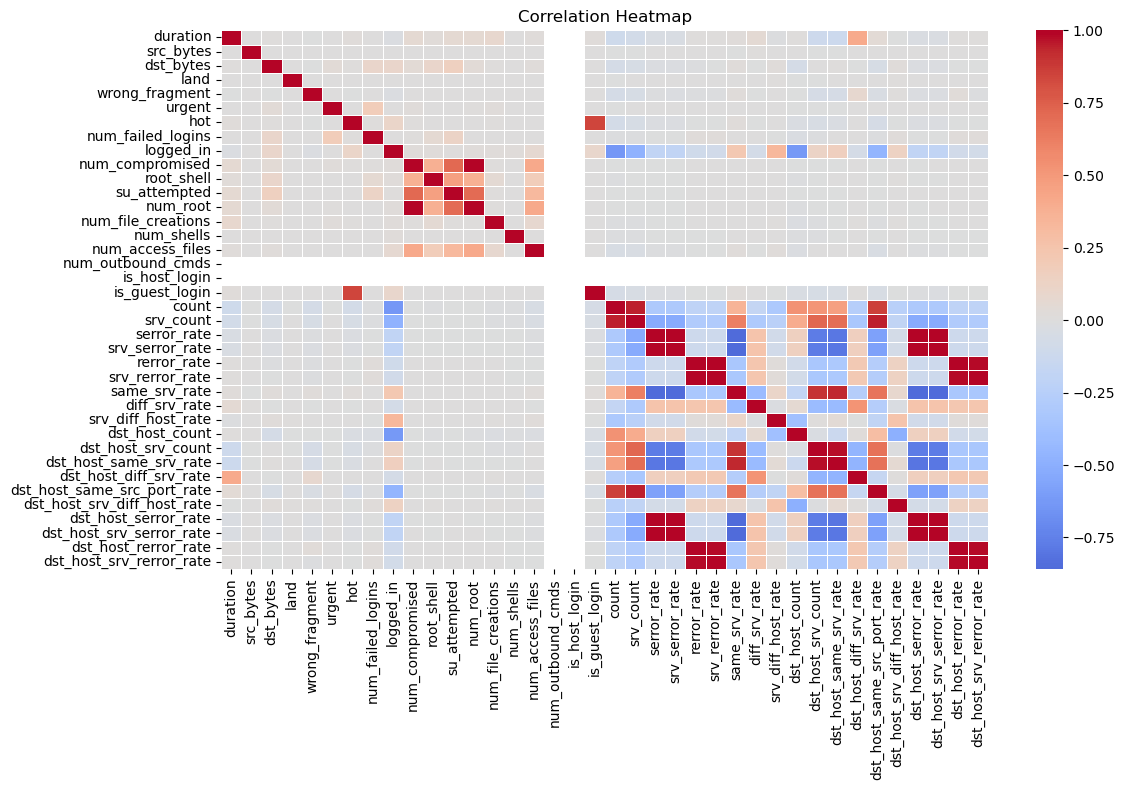

In [29]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


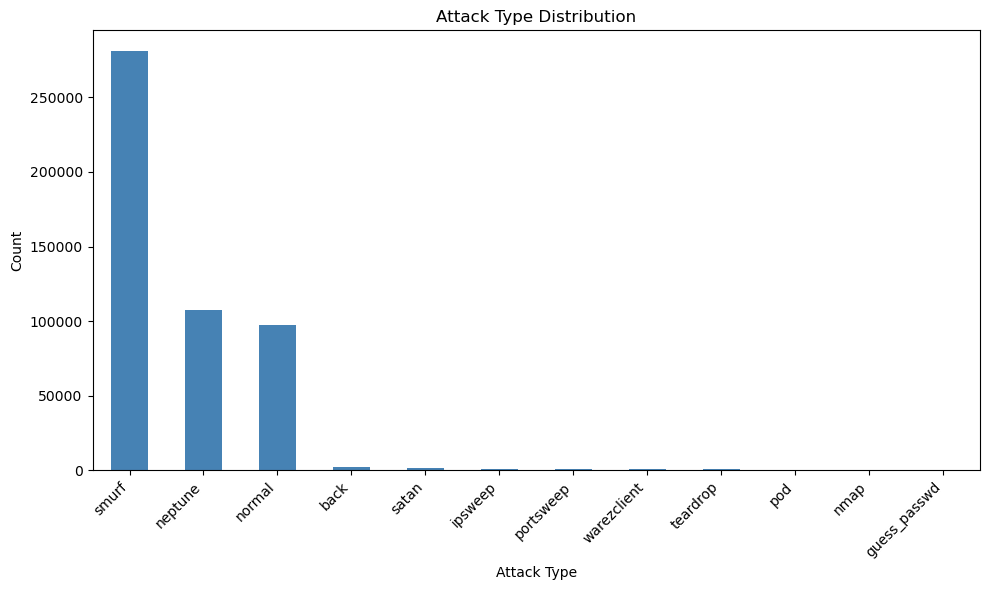

In [30]:
plt.figure(figsize=(10, 6))
df['attack_type'].value_counts().plot(kind='bar', color='steelblue')
plt.title('Attack Type Distribution')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [31]:
df['attack_type'].value_counts()

attack_type
smurf           280790
neptune         107201
normal           97278
back              2203
satan             1589
ipsweep           1247
portsweep         1040
warezclient       1020
teardrop           979
pod                264
nmap               231
guess_passwd        53
Name: count, dtype: int64

In [32]:
df = df.drop(['num_outbound_cmds', 'is_host_login'], axis=1)

In [33]:
le = LabelEncoder()
df['protocol_type'] = le.fit_transform(df['protocol_type'])
df['service'] = le.fit_transform(df['service'])
df['flag'] = le.fit_transform(df['flag'])

In [34]:
X = df.drop(['attack_type'], axis=1)
y = df['attack_type']

In [35]:
correlation_matrix = X.corr().abs()
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
highly_correlated = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]

In [36]:
X_reduced = X.drop(columns=highly_correlated)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=42, stratify=y)

In [38]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
class_counts = pd.Series(y_train).value_counts()
max_count = class_counts.max()
target_count = int(max_count * 0.3)

sampling_strategy = {}
for attack_class, count in class_counts.items():
    if count < target_count:
        sampling_strategy[attack_class] = target_count

smote_train = SMOTE(sampling_strategy=sampling_strategy, random_state=42, k_neighbors=1)
X_train_balanced, y_train_balanced = smote_train.fit_resample(X_train_scaled, y_train)


In [40]:
test_class_counts = pd.Series(y_test).value_counts()
test_target_count = int(test_class_counts.median())

test_sampling_strategy = {}
for attack_class, count in test_class_counts.items():
    if count < test_target_count:
        test_sampling_strategy[attack_class] = test_target_count

smote_test = SMOTE(sampling_strategy=test_sampling_strategy, random_state=42, k_neighbors=1)
X_test_balanced, y_test_balanced = smote_test.fit_resample(X_test_scaled, y_test)


In [41]:
dt = DecisionTreeClassifier(max_depth=15, min_samples_split=10, random_state=42)
dt.fit(X_train_balanced, y_train_balanced)
dt_pred = dt.predict(X_test_balanced)
dt_acc = accuracy_score(y_test_balanced, dt_pred)


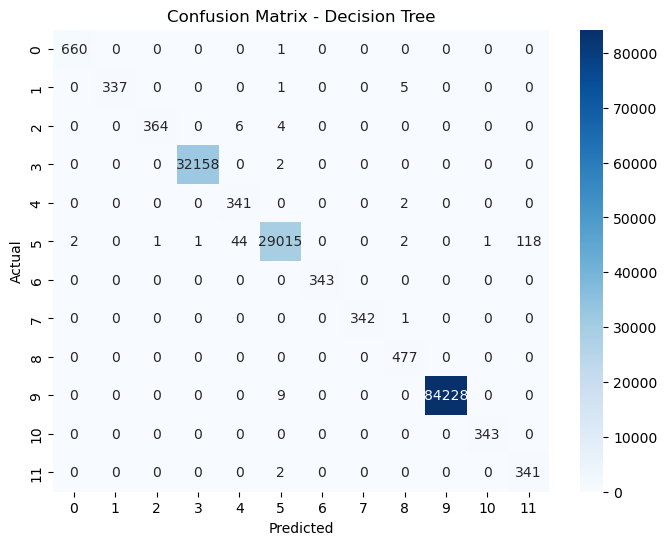

In [42]:
cm = confusion_matrix(y_test_balanced, dt_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

In [43]:
classification_report(y_test_balanced, dt_pred, zero_division=0)


'              precision    recall  f1-score   support\n\n        back       1.00      1.00      1.00       661\nguess_passwd       1.00      0.98      0.99       343\n     ipsweep       1.00      0.97      0.99       374\n     neptune       1.00      1.00      1.00     32160\n        nmap       0.87      0.99      0.93       343\n      normal       1.00      0.99      1.00     29184\n         pod       1.00      1.00      1.00       343\n   portsweep       1.00      1.00      1.00       343\n       satan       0.98      1.00      0.99       477\n       smurf       1.00      1.00      1.00     84237\n    teardrop       1.00      1.00      1.00       343\n warezclient       0.74      0.99      0.85       343\n\n    accuracy                           1.00    149151\n   macro avg       0.97      0.99      0.98    149151\nweighted avg       1.00      1.00      1.00    149151\n'

In [44]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(dt, X_train_balanced, y_train_balanced, cv=5, scoring='accuracy')


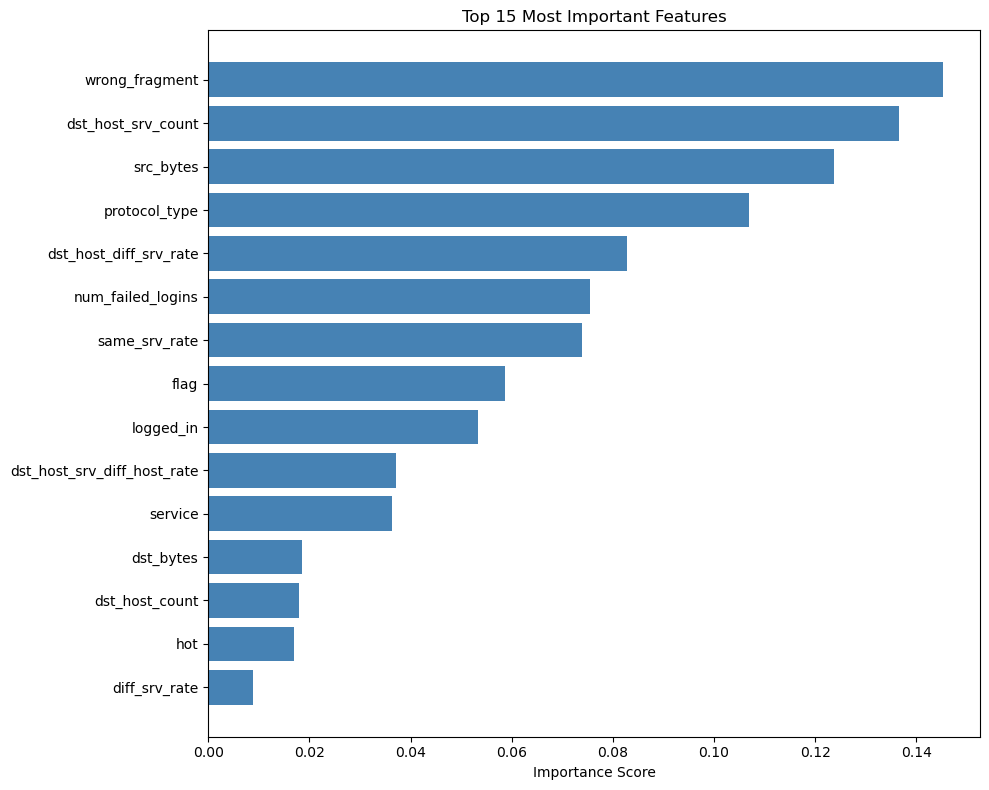

In [45]:
feature_importance_df = pd.DataFrame({
    'feature': X_reduced.columns,
    'importance': dt.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 8))
top_features = feature_importance_df.head(15)
plt.barh(range(len(top_features)), top_features['importance'], color='steelblue')
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Importance Score')
plt.title('Top 15 Most Important Features')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


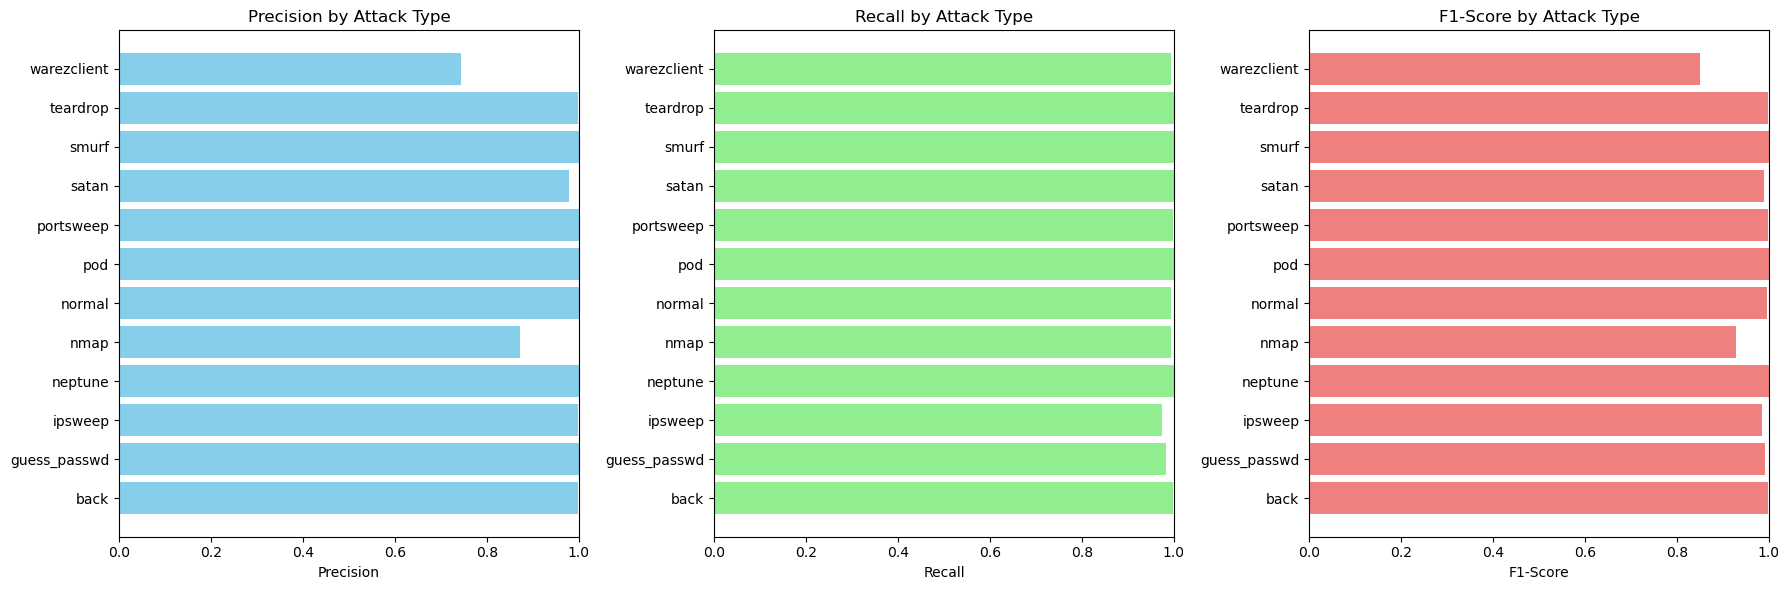

In [46]:
report = classification_report(y_test_balanced, dt_pred, output_dict=True, zero_division=0)

classes = [key for key in report.keys() if key not in ['accuracy', 'macro avg', 'weighted avg']]
precision = [report[cls]['precision'] for cls in classes]
recall = [report[cls]['recall'] for cls in classes]
f1_score = [report[cls]['f1-score'] for cls in classes]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].barh(classes, precision, color='skyblue')
axes[0].set_xlabel('Precision')
axes[0].set_title('Precision by Attack Type')
axes[0].set_xlim([0, 1])

axes[1].barh(classes, recall, color='lightgreen')
axes[1].set_xlabel('Recall')
axes[1].set_title('Recall by Attack Type')
axes[1].set_xlim([0, 1])

axes[2].barh(classes, f1_score, color='lightcoral')
axes[2].set_xlabel('F1-Score')
axes[2].set_title('F1-Score by Attack Type')
axes[2].set_xlim([0, 1])

plt.tight_layout()
plt.show()


In [47]:
import os

os.makedirs('models', exist_ok=True)
joblib.dump(dt, 'models/decision_tree_ids.pkl')
joblib.dump(scaler, 'models/scaler.pkl')
joblib.dump(X_reduced.columns.tolist(), 'models/feature_names.pkl')


['models/feature_names.pkl']